Problem Statement:
You work in XYZ Company as a Python Data Scientist. The company officials have collected some data
on salaries based on year of experience and wish for you to create a model from it.
Dataset: diabetes.csv
Tasks to be performed:
1. Load the dataset using pandas
2. Extract data fromOutcome column is a variable named Y
3. Extract data from every column except Outcome column in a variable named X
4. Divide the dataset into two parts for training and testing in 70% and 30% proportion
5. Create and train Decision Tree Model on training set
6. Make predictions based on the testing set using the trained model
7. Check the performance by calculating the confusion matrix and accuracy score of the model 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#1. Load the dataset using pandas
diabetes=pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\diabetes-1.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#2. Extract data from Outcome column is a variable named Y

Y=diabetes['Outcome']

In [5]:
#3. Extract data from every column except Outcome column in a variable named X

X=diabetes.drop(columns='Outcome',axis=1)

In [6]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


import numpy as np
diabetes.iloc[:,:-1]


In [7]:
#4. Divide the dataset into two parts for training and testing in 70% and 30% proportion

from sklearn.model_selection import train_test_split
x_t,x_te,y_t,y_te=train_test_split(X,Y,train_size=.70,random_state=0)

In [8]:
#5. Create and train Decision Tree Model on training set

from sklearn import tree
from sklearn import preprocessing 
DT=tree.DecisionTreeClassifier(random_state=0)
DT.fit(x_t,y_t)


DecisionTreeClassifier(random_state=0)

In [9]:
#6. Make predictions based on the testing set using the trained model

y_t_pred=DT.predict(x_t)
y_te_pred=DT.predict(x_te)

In [10]:
#7. Check the performance by calculating the confusion matrix and accuracy score of the model 

from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_te_pred,y_te)

array([[123,  30],
       [ 34,  44]], dtype=int64)

In [11]:
accuracy_score(y_te_pred,y_te)

0.7229437229437229

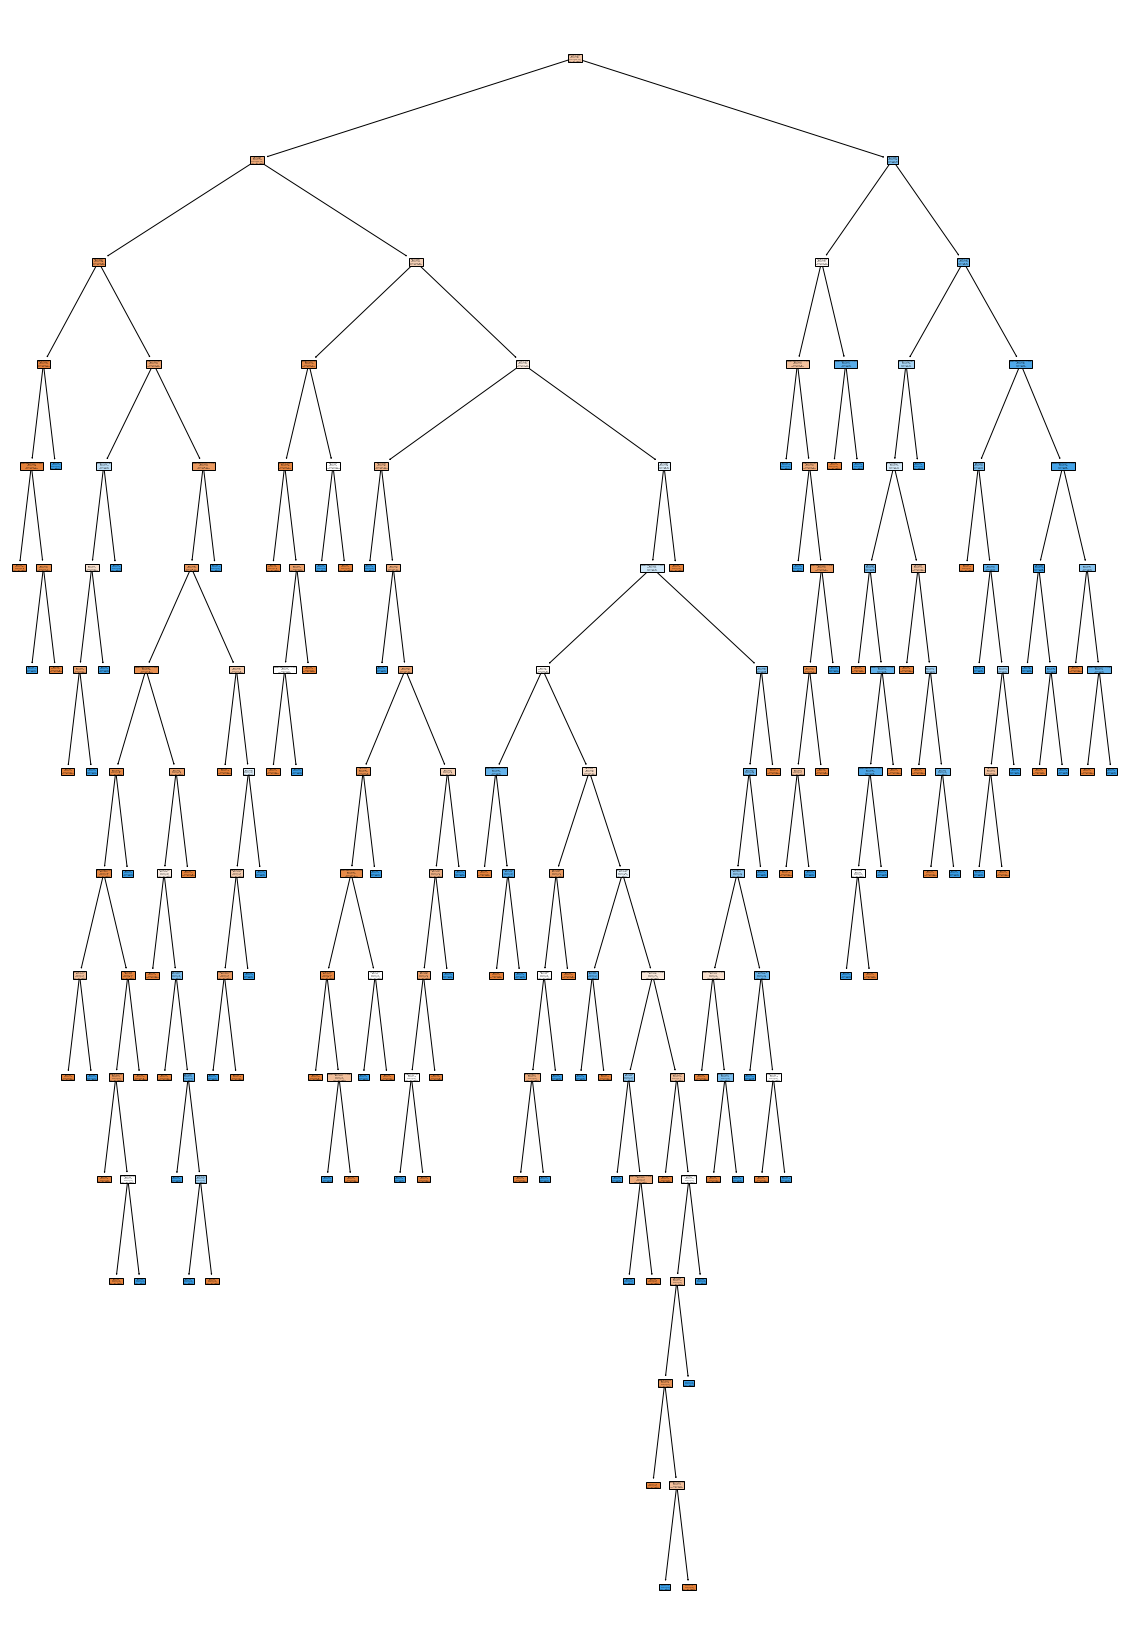

In [12]:
plt.figure(figsize=(20,30))
features=diabetes.columns
classes=['Not diabetes','diabetes']
tree.plot_tree(DT,feature_names=features,class_names=classes,filled=True)
plt.show()

In [13]:

def plot_confusionmatrix(y_t_pred,y_t,dom):
    print(f'{dom} confusion matrix')
    cf=confusion_matrix(y_t_pred,y_t)
    sns.heatmap(cf,annot=True,xticklabels=classes,yticklabels=classes,cmap='Blues',fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.7229437229437229
Train confusion matrix


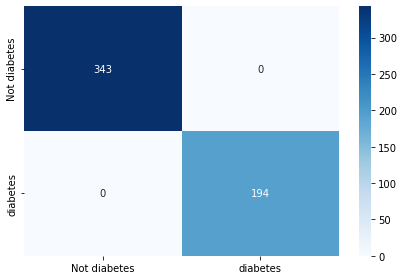

Test confusion matrix


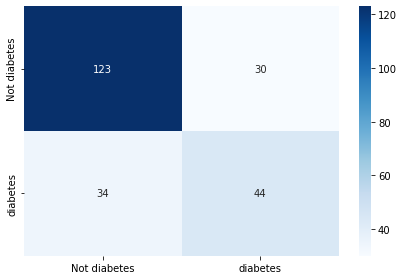

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score

print(f'Train score {accuracy_score(y_t_pred,y_t)}')
print(f'Test score {accuracy_score(y_te_pred,y_te)}')
plot_confusionmatrix(y_t_pred,y_t,dom='Train')
plot_confusionmatrix(y_te_pred,y_te,dom='Test')

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

DTC = DecisionTreeClassifier(max_depth=15)
#RFC = RandomForestClassifier(max_depth=15)
BC = BaggingClassifier(base_estimator=DTC)
#ADB = AdaBoostClassifier(base_estimator=DTC)

DTC = DecisionTreeClassifier(max_depth=15)
BC = BaggingClassifier(base_estimator=DTC)

X,Y = make_classification()
params = {
    "n_estimators": [10, 20, 100],
    'base_estimator__max_features': [2, 5, 10],
    "base_estimator__min_impurity_decrease": [1.0, 2.0, 3.0]
}

GSC1 = GridSearchCV(estimator=BC, param_grid=params , cv=5)
GSC1.fit(X, Y)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15)),
             param_grid={'base_estimator__max_features': [2, 5, 10],
                         'base_estimator__min_impurity_decrease': [1.0, 2.0,
                                                                   3.0],
                         'n_estimators': [10, 20, 100]})

In [16]:
BC.get_params().keys()

#dict_keys(['base_estimator__ccp_alpha', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_impurity_split', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

dict_keys(['base_estimator__ccp_alpha', 'base_estimator__class_weight', 'base_estimator__criterion', 'base_estimator__max_depth', 'base_estimator__max_features', 'base_estimator__max_leaf_nodes', 'base_estimator__min_impurity_decrease', 'base_estimator__min_samples_leaf', 'base_estimator__min_samples_split', 'base_estimator__min_weight_fraction_leaf', 'base_estimator__random_state', 'base_estimator__splitter', 'base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [17]:
#Pre pruning techniques
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf' : [1,2]}
            
clf =tree.DecisionTreeClassifier()
gcv=GridSearchCV(estimator= clf,param_grid=params)
gcv.fit(x_t,y_t)


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

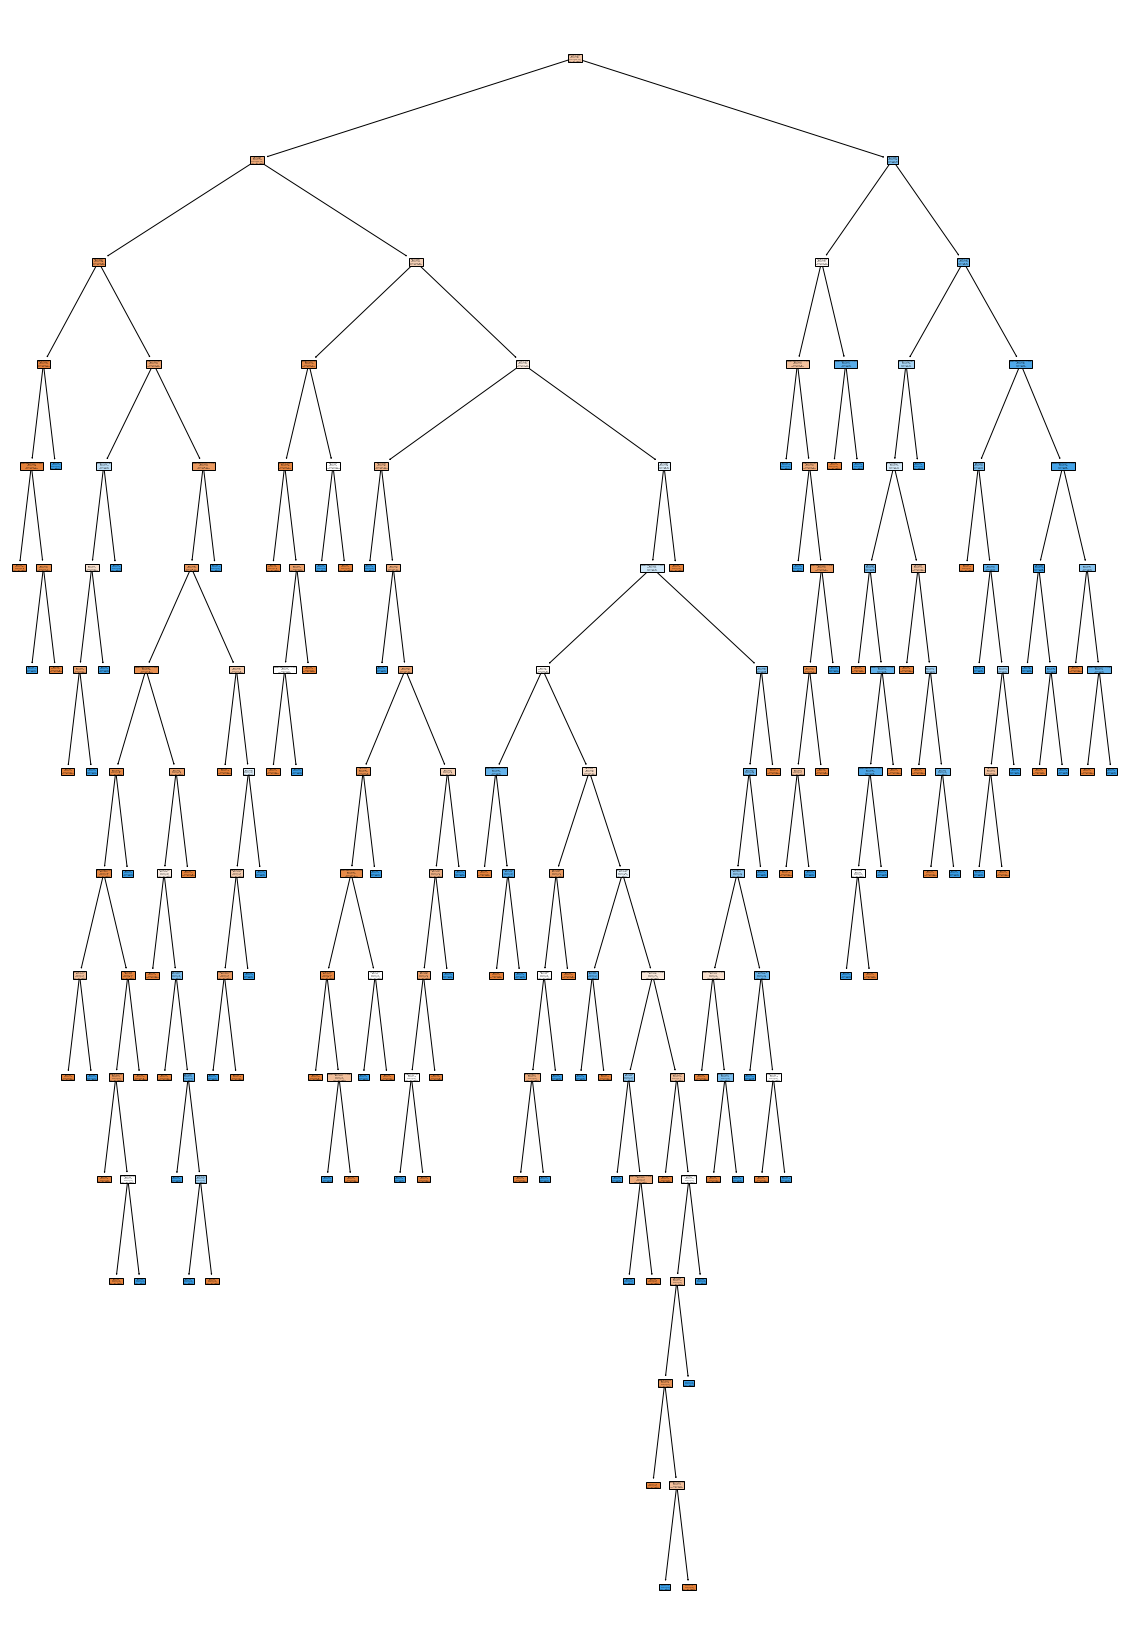

In [18]:
plt.figure(figsize=(20,30))
features=diabetes.columns
classes=['Not diabetes','diabetes']
tree.plot_tree(DT,feature_names=features,class_names=classes,filled=True)
plt.show()

Train score 0.7579143389199255
Test score 0.7272727272727273
Train confusion matrix


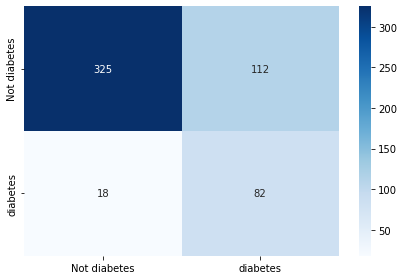

Test confusion matrix


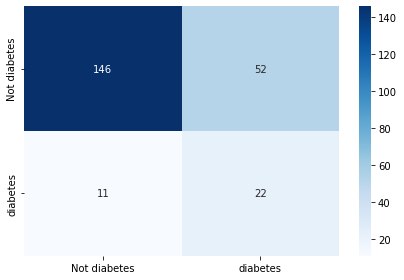

In [19]:
model=gcv.best_estimator_
model.fit(x_t,y_t)
y_t_pred=model.predict(x_t)
y_te_pred=model.predict(x_te)
print(f'Train score {accuracy_score(y_t_pred,y_t)}')
print(f'Test score {accuracy_score(y_te_pred,y_te)}')
plot_confusionmatrix(y_t_pred,y_t,dom='Train')
plot_confusionmatrix(y_te_pred,y_te,dom='Test')

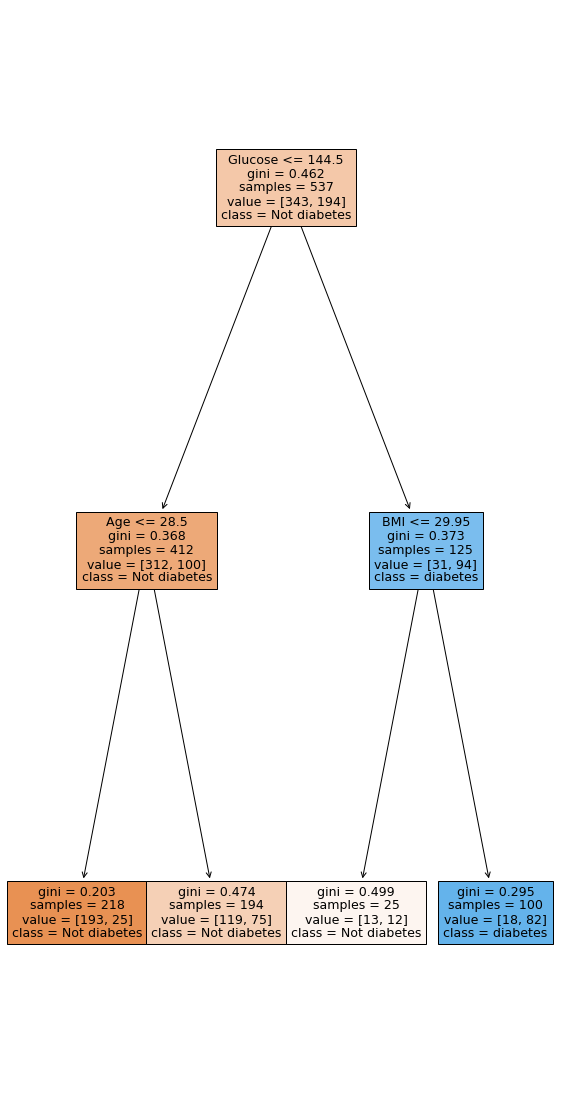

In [20]:
plt.figure(figsize=(10,20))
features = diabetes.columns
classes = ['Not diabetes','diabetes']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [21]:
#Post pruning techniques
#Cost Complexity Pruning
path = clf.cost_complexity_pruning_path(x_t, y_t)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00120267 0.00121613 0.00159617 0.00162942 0.00169291
 0.00170131 0.00171895 0.00172918 0.00175696 0.00182171 0.00184446
 0.00212823 0.0022991  0.00239425 0.00248293 0.00260447 0.0027933
 0.0027933  0.0027933  0.00294677 0.00297952 0.00297952 0.00304723
 0.0031006  0.00310366 0.00319234 0.00319234 0.00325024 0.00337844
 0.0035149  0.00352689 0.00361485 0.00361932 0.00424025 0.00425645
 0.00427895 0.00429019 0.00433988 0.00438259 0.00511497 0.00515031
 0.00527623 0.00535285 0.00576217 0.0059421  0.00636916 0.00705392
 0.00853316 0.0086108  0.01649554 0.02826806 0.09264128]


In [22]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_t, y_t)
    clfs.append(clf)

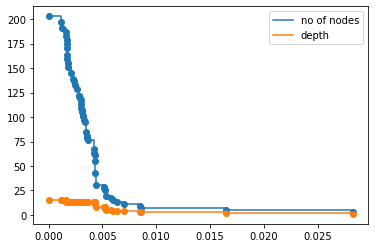

In [23]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()


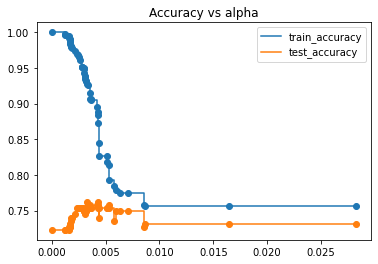

In [24]:
t_acc = []
te_acc = []
for c in clfs:
    y_t_pred = c.predict(x_t)
    y_te_pred = c.predict(x_te)
    t_acc.append(accuracy_score(y_t_pred,y_t))
    te_acc.append(accuracy_score(y_te_pred,y_te))

plt.scatter(ccp_alphas,t_acc)
plt.scatter(ccp_alphas,te_acc)
plt.plot(ccp_alphas,t_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,te_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.7560521415270018
Test score 0.7316017316017316
Train confusion matrix


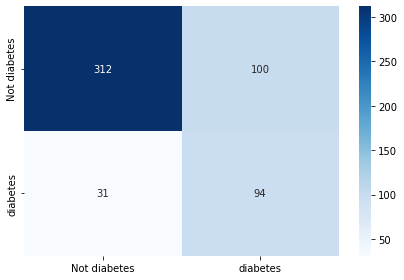

Test confusion matrix


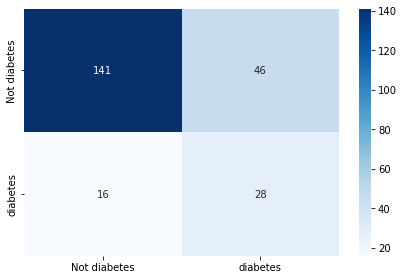

In [25]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(x_t,y_t)
y_t_pred = clf_.predict(x_t)
y_te_pred = clf_.predict(x_te)

print(f'Train score {accuracy_score(y_t_pred,y_t)}')
print(f'Test score {accuracy_score(y_te_pred,y_te)}')
plot_confusionmatrix(y_t_pred,y_t,dom='Train')
plot_confusionmatrix(y_te_pred,y_te,dom='Test')

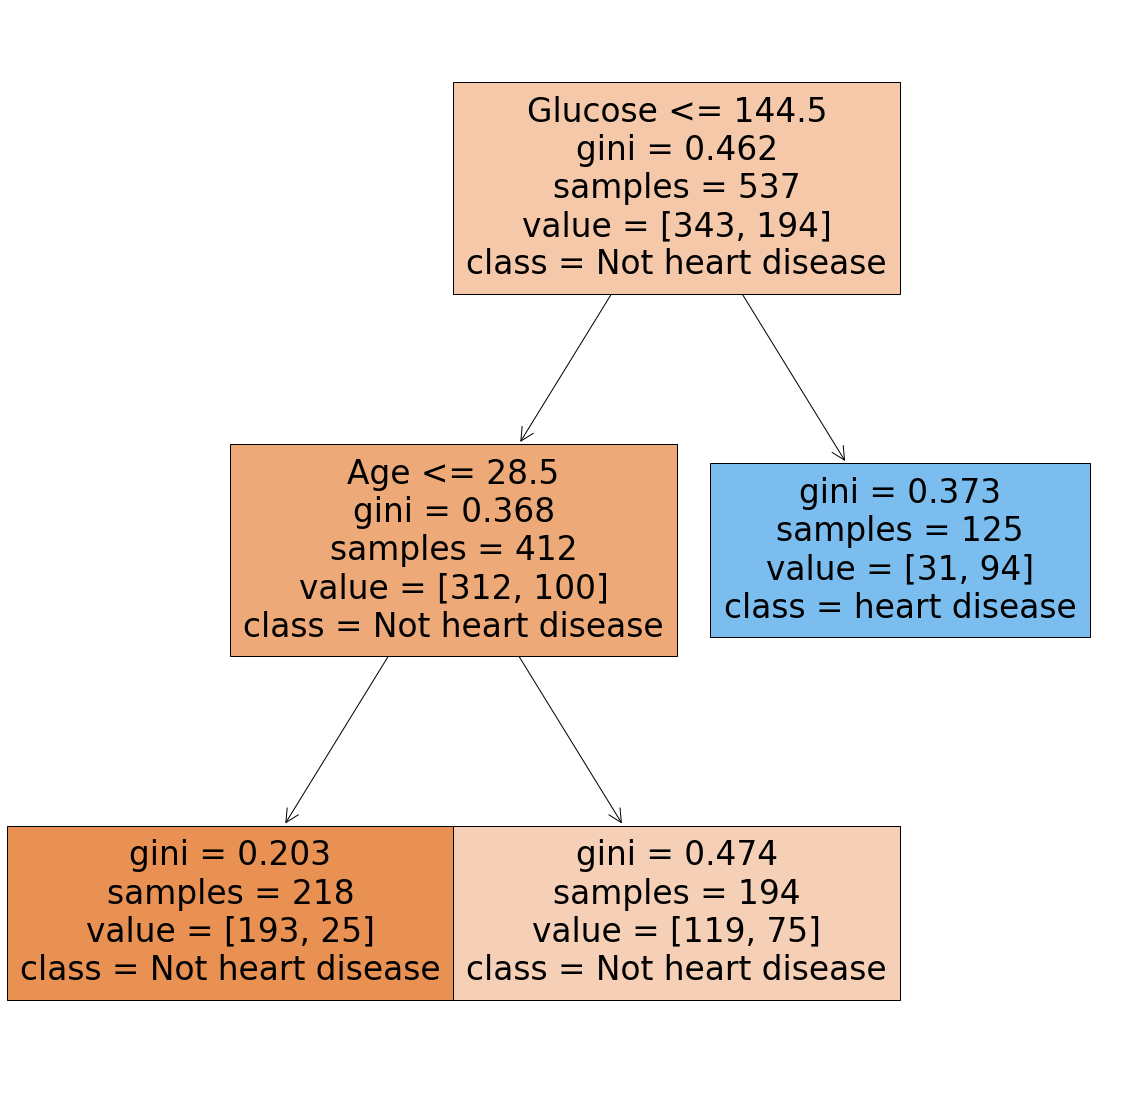

In [26]:
plt.figure(figsize=(20,20))
features = diabetes.columns
classes = ['Not heart disease','heart disease']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()